In [19]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


def Q_learning(p):
        Q_list=[]
        av=[]
        num_play=100
        experiment=10000
        for i in range(num_play):
        
            num_col=3
            num_row=3
            gamma=0.95
            action_value=[]
            n_s=[]
            n_sa=[]
            rewards_sum_list=[]
            acc_time_steps_list=[]
            acc_time_steps=0
            average_r_s=[]
            Q_max=[]
            Q_max_sum=[]
            
            for x in range(num_row):
                action_value.append([])
                n_sa.append([])
                for y in range(num_col):
                    action_value[x].append([])
                    n_sa[x].append([])
                    for z in range(4):
                        action_value[x][y].append(0)
                        n_sa[x][y].append(0)
        
            for x in range(num_row):
                n_s.append([])
                for y in range(num_col):
                    n_s[x].append(0)
        
            for x in range(experiment):
                acc_time_steps_list.append(0)
                average_r_s.append(0)
                Q_max_sum.append(0)
            

            action_dictionary={
                0:[0,1],
                1:[1,0],
                2:[0,-1],
                3:[-1,0],
            }
            episode=0
            reward_list=[]
            
            while episode<experiment:
            
            
                state=[0,0]
                s_row=state[0]
                s_col=state[1]
                goal=[2,2]
                step=0
                n_done=True
                while n_done:
                    episode+=1
                    step+=1
                    n_s[s_row][s_col]+=1
                    epsilon=1/np.sqrt(n_s[s_row][s_col])
                    if np.random.rand(1)> epsilon:
                        action_index=np.argmax(action_value[s_row][s_col])
                    else:
                        action_index=np.random.choice(range(4))
                    action=action_dictionary[action_index]
                    new_s_col=state[1]+action[1]
                    if new_s_col>2:
                        new_s_col=2
                    if new_s_col<0:
                        new_s_col=0
                    
                    new_s_row=state[0]+action[0]
                    if new_s_row>2:
                        new_s_row=2
                    if new_s_row<0:
                        new_s_row=0                
                    new_state= [new_s_row,new_s_col]                
                
                    if new_state==goal:
                        reward =5
                    else:
                        if np.random.rand(1)>0.5:
                            reward =-12
                        else:
                            reward =10
                    n_sa[s_row][s_col][action_index]+=1
                    alpha=1/np.power(n_sa[s_row][s_col][action_index],p)
                    new_action_index=np.argmax(action_value[new_s_row][new_s_col])
                    action_value[s_row][s_col][action_index]+=(alpha*(reward+gamma*action_value[new_s_row][new_s_col][new_action_index]-action_value[s_row][s_col][action_index]))
                    state=new_state

                    s_row=new_s_row
                    s_col=new_s_col                
                    reward_list.append(reward)
                    average_r_s[episode-1]=np.sum(reward_list)/episode
                    Q_max.append(max(action_value[0][0]))
                
                    if state ==goal or episode==experiment:
                        n_done=False
            Q_list.append(Q_max)
            av.append(average_r_s)
        return av , Q_list  
a,b=Q_learning(1)

In [21]:
num_play=100
experiment=10000

av=[]
Q_lis=[]
for i in range(experiment):#10000
    ai=[]
    qj=[]
    for j in range(num_play):#100
        ai.append(a[j][i])
        qj.append(b[j][i])
    av.append(sum(ai)/100)
    Q_lis.append(sum(qj)/100)


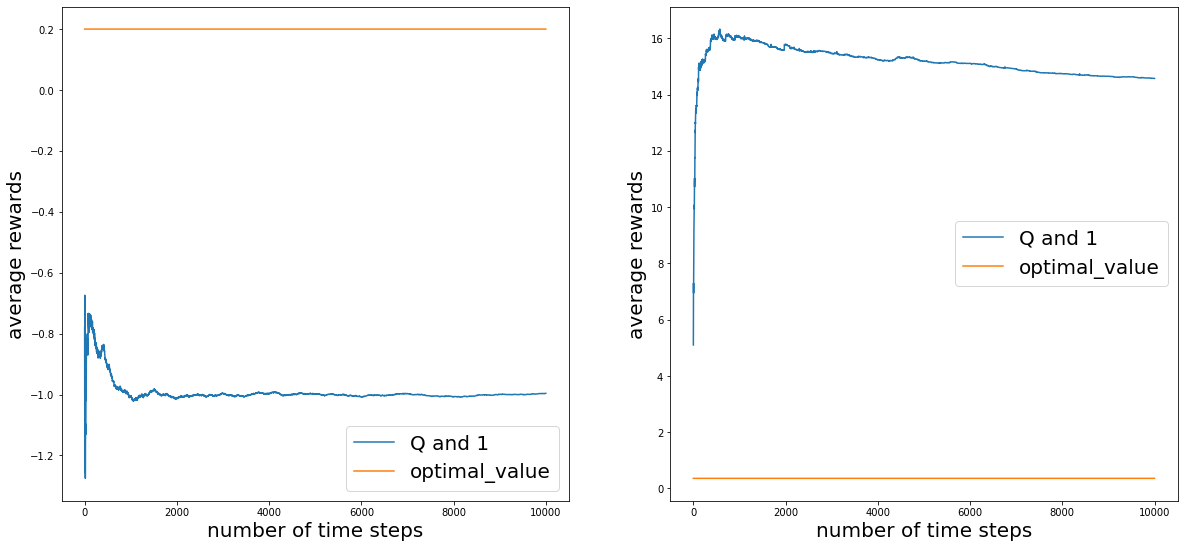

In [22]:
num_play=10000
fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)

ax1.plot(av,label='Q and 1')
#ax1.plot(,label='double_Q and 1')
optimal_value=[0.2 for i in range(num_play)]
ax1.plot(optimal_value,label='optimal_value')
ax1.set_xlabel('number of time steps',fontsize=20)
ax1.set_ylabel('average rewards',fontsize=20)
ax1.legend(fontsize=20)

ax2 = fig.add_subplot(222)

ax2.plot(Q_lis,label='Q and 1')
#ax1.plot(,label='double_Q and 1')
optimal_value=[0.36 for i in range(num_play)]
ax2.plot(optimal_value,label='optimal_value')
ax2.set_xlabel('number of time steps',fontsize=20)
ax2.set_ylabel('average rewards',fontsize=20)
ax2.legend(fontsize=20)